In [10]:
import pandas as pd
file_path = "C:/Users/drish/OneDrive/Desktop/MCSE/bank.csv"
df=pd.read_csv(file_path)
df.describe(include="all")

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Unnamed: 7,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,0.0,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,NaN,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,NaN,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [38]:

missing_counts = df.isnull().sum()
missing_rows = df.isnull().sum(axis=1)
empty_columns = missing_counts[missing_counts == len(df)].index
print("\nColumns that are completely empty:")
print(empty_columns)
# Display the number of rows with missing values
print("\nNumber of missing values per row:")
print(missing_rows.value_counts())
# Display the number of missing values in each column
print("Missing values per column:")
print(missing_counts)
# Display the number of missing values in each column
print("Missing values per column:")
print(missing_counts)
df_cleaned = df.drop(columns=empty_columns)
print("\nColumns dropped due to being completely empty:")
print(empty_columns)
print("\nDataFrame after dropping empty columns:")
df_cleaned.describe(include='all')
# Work with cleaned DataFrame
df_imputed = df_cleaned.copy() 
# Impute missing values for non-empty columns
for column in df_imputed.columns:
    if df_imputed[column].isnull().sum() > 0:
        if df_imputed[column].dtype == 'object':
            # Impute with mode for categorical columns
            mode_value = df_imputed[column].mode().iloc[0]
            df_imputed[column] = df_imputed[column].fillna(mode_value)
        else:
            # Impute with mean for numerical columns
            mean_value = df_imputed[column].mean()
            df_imputed[column] = df_imputed[column].fillna(mean_value)
print("\nDataFrame after imputing missing values:")
df_imputed.describe(include='all')
# Identify duplicate rows
print("\nDuplicate rows:")
df_imputed[df_imputed.duplicated(keep='first')]
# Handle duplicates
df_final = df_imputed.drop_duplicates()
print("\nNumber of duplicate rows removed:")
print(len(df_imputed) - len(df_final))
print("\nDataFrame after removing duplicates:")
df_final.describe(include='all')
# Handle outliers

# Function to identify outliers in a column
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Identify and display potential outliers for each numerical column
for column in df_final.select_dtypes(include=['float64', 'int64']).columns:
    outliers = identify_outliers(df_final, column)
    if not outliers.empty:
        print(f"\nPotential outliers in column '{column}':")
        print(outliers[[column]])





Columns that are completely empty:
Index(['Unnamed: 7'], dtype='object')

Number of missing values per row:
1    10127
Name: count, dtype: int64
Missing values per column:
CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Unnamed: 7                  10127
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
dtype: int64
Missing values per column:
CLIENTNUM                       0
Attrition_Flag                  0
Custo


Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:

Number of rows before and after outlier removal:
Before: 10127
After: 6463

DataFrame after handling outliers:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6.463000e+03,6463,6463.000000,6463,6463.000000,6463,6463,6463,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
unique,NaN,2,NaN,2,NaN,7,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5380,NaN,3988,NaN,2006,2994,6341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.384725e+08,NaN,46.384032,NaN,2.389138,NaN,NaN,NaN,35.951106,3.939192,2.274486,2.497138,5084.608170,1140.233792,3944.374377,0.728738,3593.651710,62.892155,0.687565,0.320961
std,3.633481e+07,NaN,7.506139,NaN,1.272785,NaN,NaN,NaN,7.036630,1.514048,0.863391,0.930392,3921.874545,817.255076,3934.216696,0.162697,1568.378776,19.472826,0.181285,0.283666
min,7.080833e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,18.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,10.000000,0.293000,510.000000,10.000000,0.207000,0.000000
25%,7.130244e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,32.000000,3.000000,2.000000,2.000000,2264.000000,0.000000,1018.000000,0.620000,2216.000000,46.000000,0.569000,0.000000
50%,7.178004e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,36.000000,4.000000,2.000000,3.000000,3359.000000,1250.000000,2229.000000,0.721000,3908.000000,67.000000,0.689000,0.260000
75%,7.722979e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,6841.000000,1766.500000,5712.500000,0.836000,4581.000000,79.000000,0.808000,0.570000


In [70]:
7.	#Correlation Analysis:Calculate the correlation of 'Customer_Age' with other numeric variables and identify the variable most strongly correlated with 'Credit_Limit'.
#PES2UG23CS185 DRISHTI GOLCHHA
correlation = df_no_outliers['Customer_Age'].corr(df['Credit_Limit'])
print("Correlation between Customer_Age and Credit_Limit:", correlation)
if correlation > 0.5:
    print("Strong positive relationship")
elif correlation > 0:
    print("Weak positive relationship")
elif correlation < -0.5:
    print("Strong negative relationship")
elif correlation < 0:
    print("Weak negative relationship")
else:
    print("No relationship")

Correlation between Customer_Age and Credit_Limit: 0.0019844400460110297
Weak positive relationship


    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10  708790833  Existing Customer            42      M                5   
14  712396908  Existing Customer            57      F                2   
19  709327383  Existing Customer            45      F                2   
21  708508758  Attrited Customer            62      F                0   
23  811604133  Existing Customer            47      F                4   

   Education_Level Marital_Status Card_Category  Months_on_book  \
10      Uneducated        Unknown          Blue              31   
14        Graduate        Married          Blue              48   
19        Graduate        Married          Blue              37   
21        Graduate        Married          Blue              49   
23         Unknown         Single          Blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                     

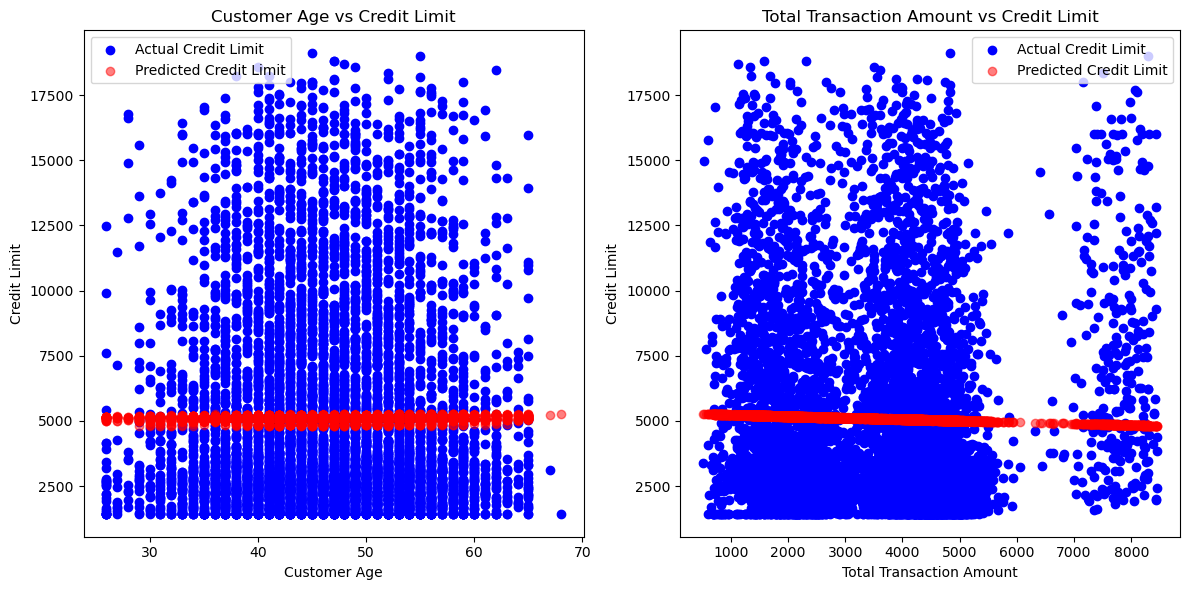

In [66]:
#11.Linear Regression Analysis:Use 'Customer_Age' and 'Total_Trans_Amt' to build a linear regression model predicting 'Credit_Limit'

#PES2UG23CS185 DRISHTI GOLCHHA
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
print(df_no_outliers.head())
X = df_no_outliers[['Customer_Age', 'Total_Trans_Amt']]
y = df_no_outliers['Credit_Limit']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
predictions = model.predict(X)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_no_outliers['Customer_Age'], y, color='blue', label='Actual Credit Limit')
plt.scatter(df_no_outliers['Customer_Age'], predictions, color='red', label='Predicted Credit Limit', alpha=0.5)
plt.title('Customer Age vs Credit Limit')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(df_no_outliers['Total_Trans_Amt'], y, color='blue', label='Actual Credit Limit')
plt.scatter(df_no_outliers['Total_Trans_Amt'], predictions, color='red', label='Predicted Credit Limit', alpha=0.5)
plt.title('Total Transaction Amount vs Credit Limit')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Credit Limit')
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
#12.Feature Engineering:Given 'Customer_Age', 'Credit_Limit', and 'Total_Trans_Amt', propose two additional features that could improve the prediction of 'Credit_Limit'.
#PES2UG23CS185 DRISHTI GOLCHHA
import pandas as pd

print(df_no_outliers.head())

# Feature Engineering
# 1. Age-to-Credit Ratio
df_no_outliers['Age_to_Credit_Ratio'] = df_no_outliers['Customer_Age'] / df_no_outliers['Credit_Limit']

# 2. Transaction Amount per Age
df_no_outliers['Trans_Amt_per_Age'] = df_no_outliers['Total_Trans_Amt'] / df_no_outliers['Customer_Age']

print(df_no_outliers[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Age_to_Credit_Ratio', 'Trans_Amt_per_Age']].head())

df_no_outliers.to_csv('bankChurned_with_features.csv', index=False)

    CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10  708790833  Existing Customer            42      M                5   
14  712396908  Existing Customer            57      F                2   
19  709327383  Existing Customer            45      F                2   
21  708508758  Attrited Customer            62      F                0   
23  811604133  Existing Customer            47      F                4   

   Education_Level Marital_Status Card_Category  Months_on_book  \
10      Uneducated        Unknown          Blue              31   
14        Graduate        Married          Blue              48   
19        Graduate        Married          Blue              37   
21        Graduate        Married          Blue              49   
23         Unknown         Single          Blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                     